# Importing Libraries

In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

# Loading Data Set
The Data Set is a set of housing data from California State of United States of America, and the average price of the houses in the respective areas. Here we'll try to build a Machine Learning model which can predict the price of the houses in California.

In [40]:
h_data= pd.read_csv('California_Houses.csv')

In [3]:
h_data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [42]:
h_data.shape

(20640, 14)

In [4]:
h_data.tail()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166
20639,89400.0,2.3886,16,2785,616,1387,530,39.37,-121.24,146866.196892,648723.337126,825569.179028,233282.769063,205473.376575


# Data Exploration 

In [5]:
h_data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [6]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [13]:
corr_data=h_data.corr()
corr_data

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,avg_beds,household_rooms
Median_House_Value,1.000000,0.688075,0.105623,0.134153,0.050594,-0.024650,0.065843,-0.144160,-0.045967,-0.469350,-0.130678,-0.092510,-0.041590,-0.030559,-0.255624,0.151948
Median_Income,0.688075,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176,-0.243443,-0.065421,-0.055253,-0.036796,-0.022424,-0.615479,0.326895
Median_Age,0.105623,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197,-0.226621,-0.031435,0.036113,-0.089753,-0.101447,0.136367,-0.153277
Tot_Rooms,0.134153,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568,-0.001540,-0.019777,-0.038935,0.031862,0.032920,-0.187361,0.133798
Tot_Bedrooms,0.050594,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378,-0.022290,-0.055809,-0.067627,0.059663,0.060250,0.086110,0.000787
Population,-0.024650,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773,-0.040273,-0.110407,-0.109691,0.079117,0.088618,0.037075,-0.072213
Households,0.065843,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310,-0.062035,-0.062118,-0.069091,0.047861,0.050157,0.067022,-0.080598
Latitude,-0.144160,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664,0.303645,0.941857,0.991571,-0.855075,-0.897397,-0.114302,0.106389
Longitude,-0.045967,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000,0.007865,-0.892026,-0.958315,0.923991,0.954864,0.092868,-0.027540
Distance_to_coast,-0.469350,-0.243443,-0.226621,-0.001540,-0.022290,-0.040273,-0.062035,0.303645,0.007865,1.000000,0.197672,0.214531,-0.077524,-0.068248,-0.077337,0.185594


# EDA & Feature Engineering 
**Here we try to analyse some info provided by the dataset and accordingly add or remove any features of the dataset that might affect the outcome of the model.**

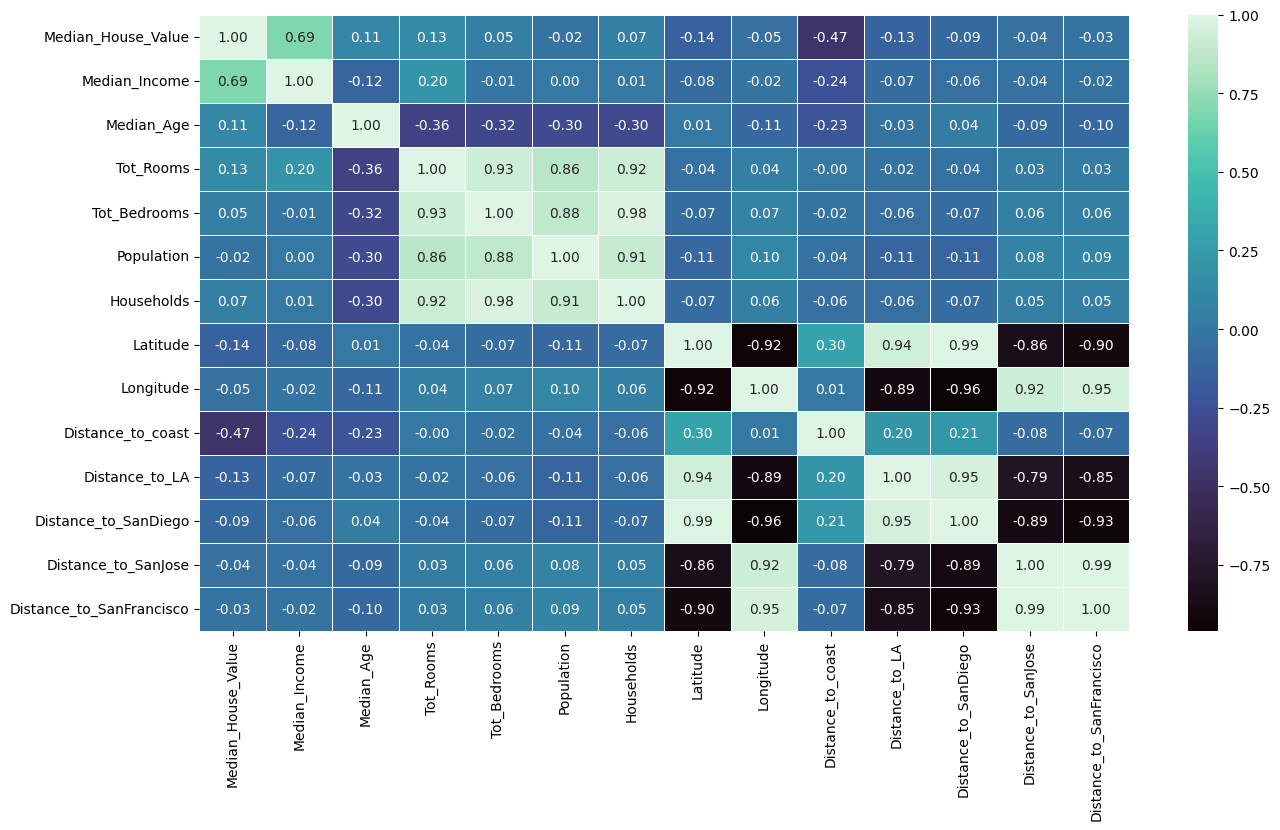

In [11]:
fig, ax=plt.subplots(figsize=(15,8))
ax= sns.heatmap(data=corr_data, annot=True, linewidths=0.5, fmt='.2f', cmap='mako')

**From the above heatma**, we can try including additional features like finding what is the average number of bedrooms in that area and mean household rooms.

In [12]:
h_data['avg_beds']= h_data['Tot_Bedrooms']/h_data['Tot_Rooms']
h_data['household_rooms']=h_data['Tot_Rooms']/h_data['Households']

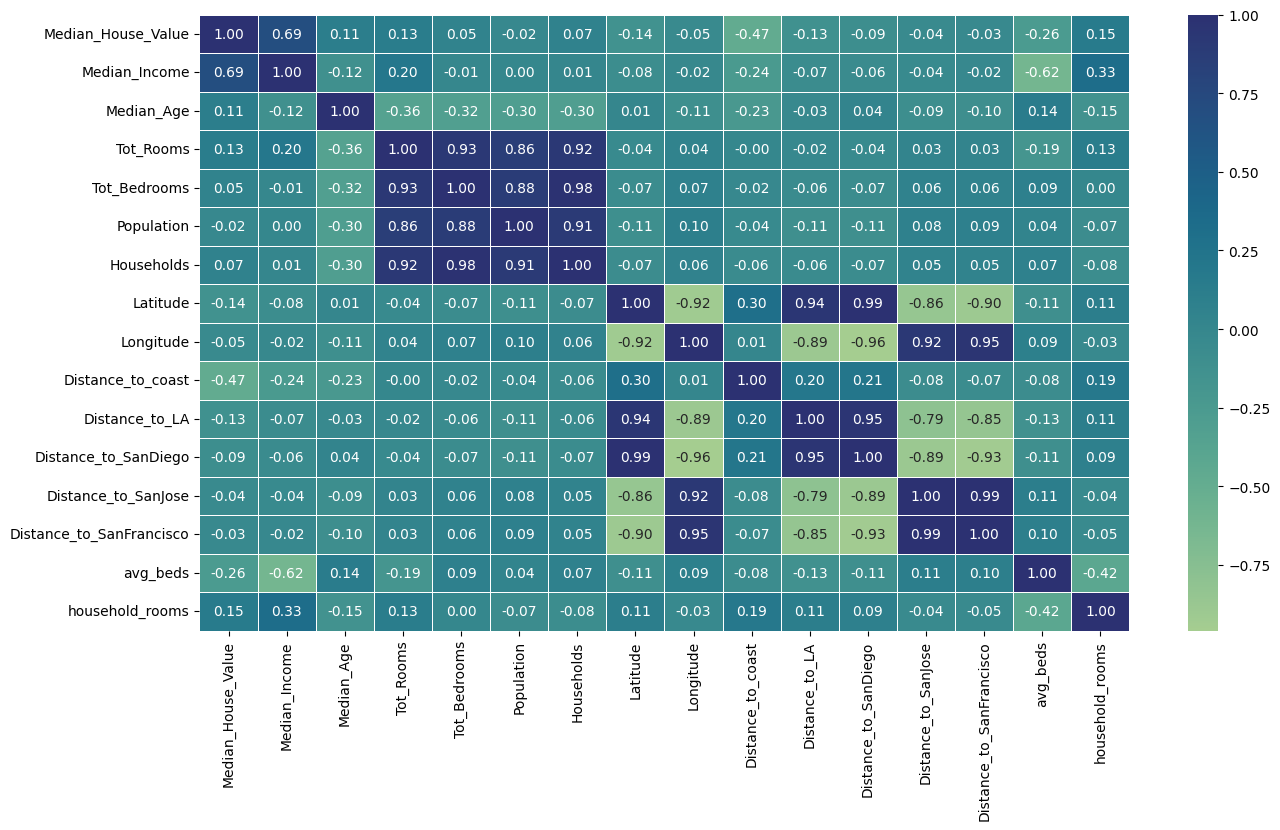

In [14]:
fig, ax=plt.subplots(figsize=(15,8))
ax= sns.heatmap(data=corr_data, annot=True, linewidths=0.5, fmt='.2f', cmap='crest')

<AxesSubplot: xlabel='Latitude', ylabel='Longitude'>

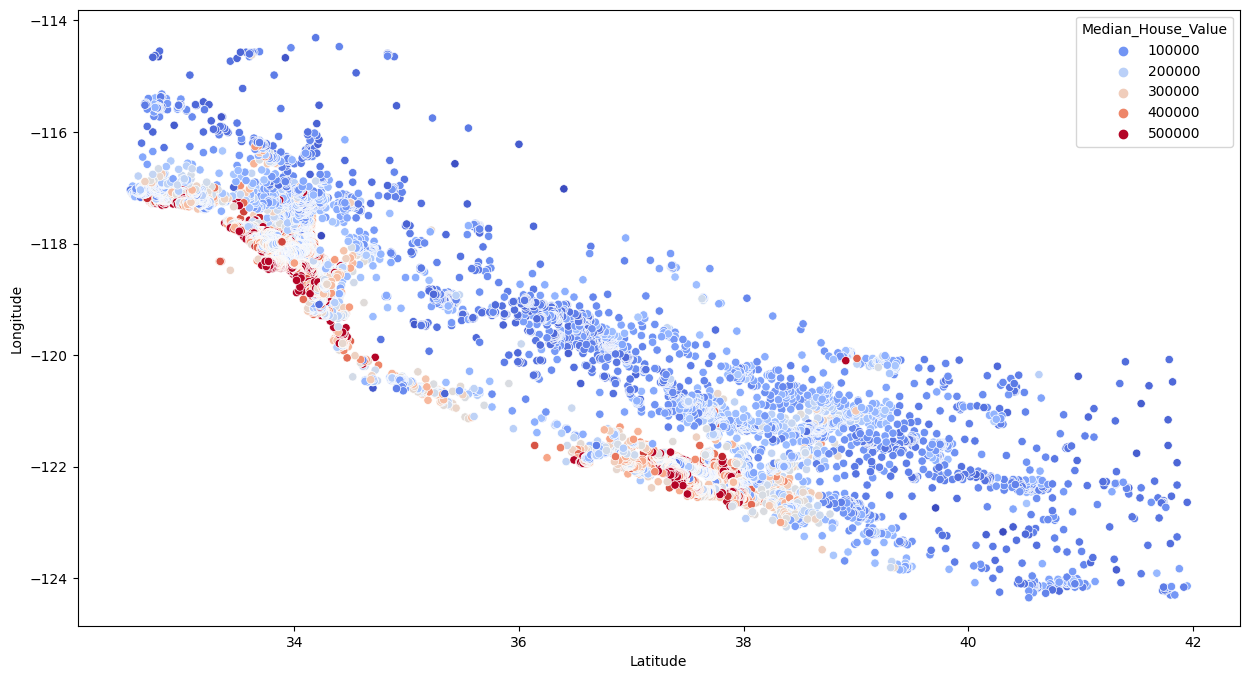

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=h_data, x='Latitude', y='Longitude', hue='Median_House_Value', palette='coolwarm')

The above graph kinda looks similar to the California's map, darker areas represent houses near to the coast which are expensive. Makes a lot of sense, obviously as described by the dataset also. So, it has a fair amount of impact on the prices of the houses of California.

# Linear Regression 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=h_data.drop(['Median_House_Value'], axis=1)
y=h_data['Median_House_Value']

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=11)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
Lin_reg=LinearRegression()
Lin_reg.fit(X_train,y_train)

LinearRegression()

In [21]:
Lin_reg.score(X_test, y_test)

0.6545354154099795

In [36]:
predictions=Lin_reg.predict(X_test)

Text(0, 0.5, 'Model Predictions')

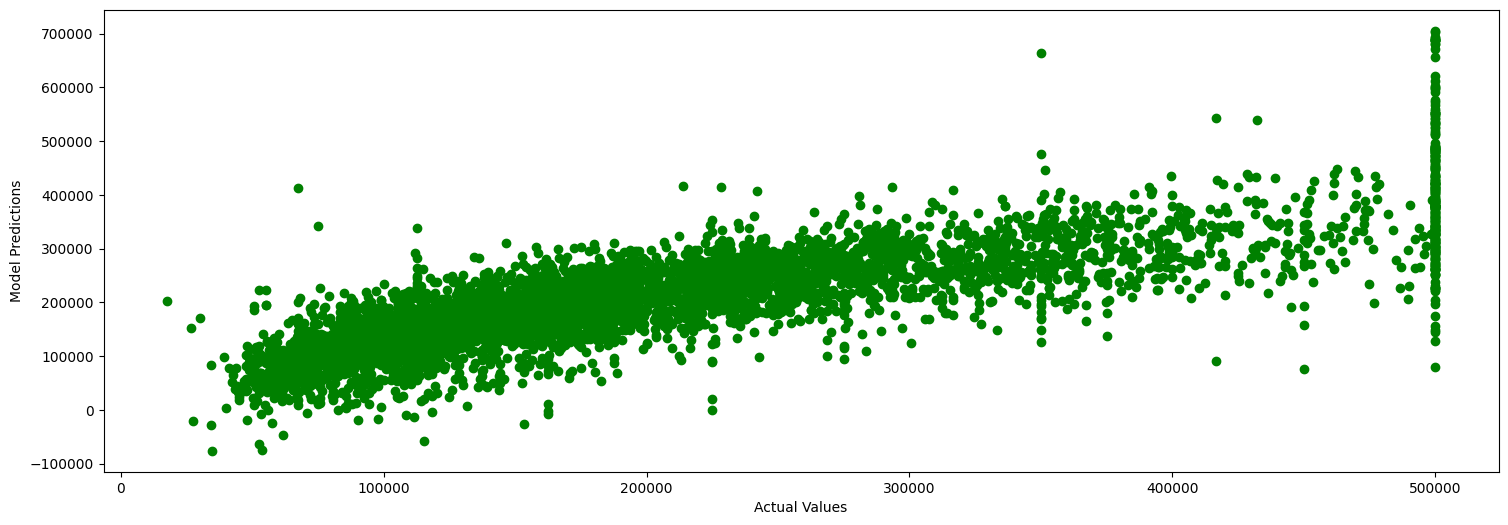

In [37]:
plt.figure(figsize=(18,6))
plt.scatter(y_test, predictions, color='Green')
plt.xlabel('Actual Values')
plt.ylabel('Model Predictions')